In [1]:
import os
os.environ["PYOPENGL_PLATFORM"] = "egl"
import pyrender
import cv2
import glob
import json
import time
import trimesh
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=3)
from scipy.spatial.transform import Rotation as R
from bpc.inference.utils.camera_utils import load_camera_params
from bpc.inference.process_pose import PoseEstimator, PoseEstimatorParams, load_pose_model
from bpc.utils.data_utils import Capture, render_mask
import bpc.utils.data_utils as du
import importlib

/home/exouser/miniconda3/envs/bop/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Auto-detected rotation mode from checkpoint: quat
Using rotation mode: quat
Loading camera parameters from: ./datasets/ipd/test/000004/scene_camera_cam3.json
Missing GT files for cam1
[]
Processing image shape: (2160, 3840, 3)

0: 736x1280 4 object_8s, 9.9ms
Speed: 4.6ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 4 object_8s, 8.4ms
Speed: 7.5ms preprocess, 8.4ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 4 object_8s, 8.4ms
Speed: 5.0ms preprocess, 8.4ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)

--- Cost Matrix Stats ---
Shape: (4, 4, 4)
Min: 2.3716, Max: 676.2111, Mean: 318.6408

Random samples from cost_matrix:
  cost_matrix[2,0,2] = 487.3504
  cost_matrix[0,3,3] = 332.3349
  cost_matrix[3,0,2] = 357.6009
  cost_matrix[0,3,1] = 322.9028
  cost_matrix[1,2,3] = 336.2789
0.7359168529510498


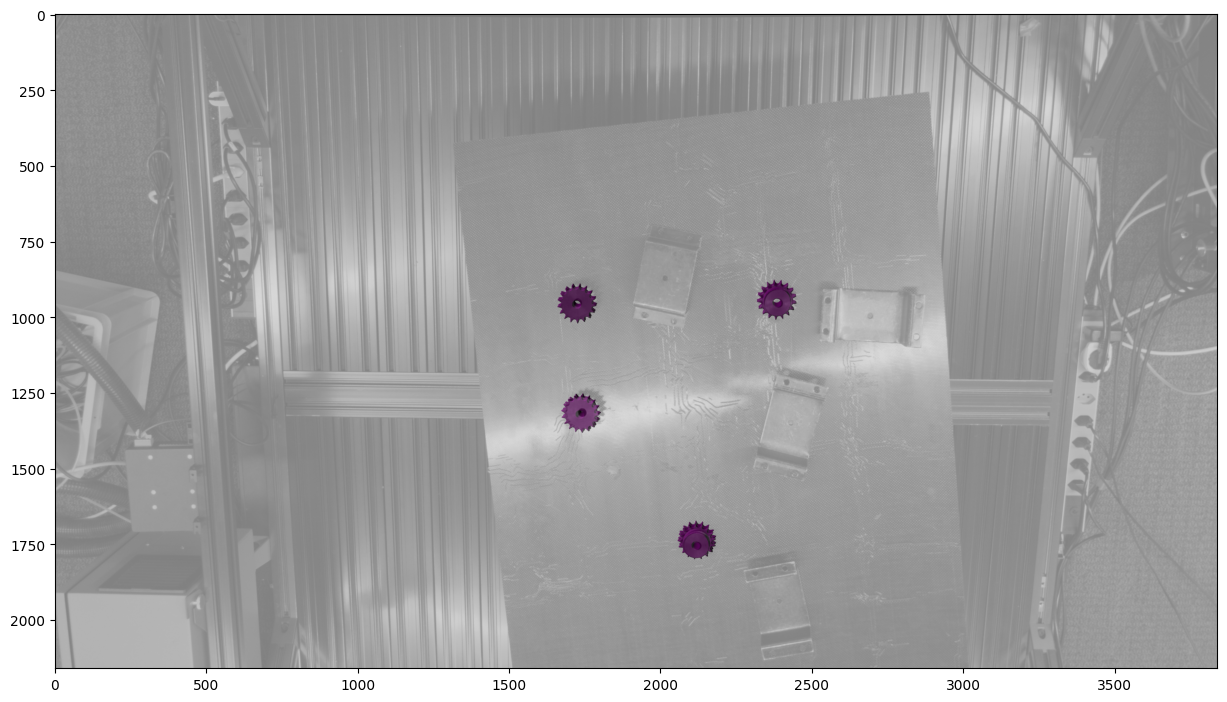

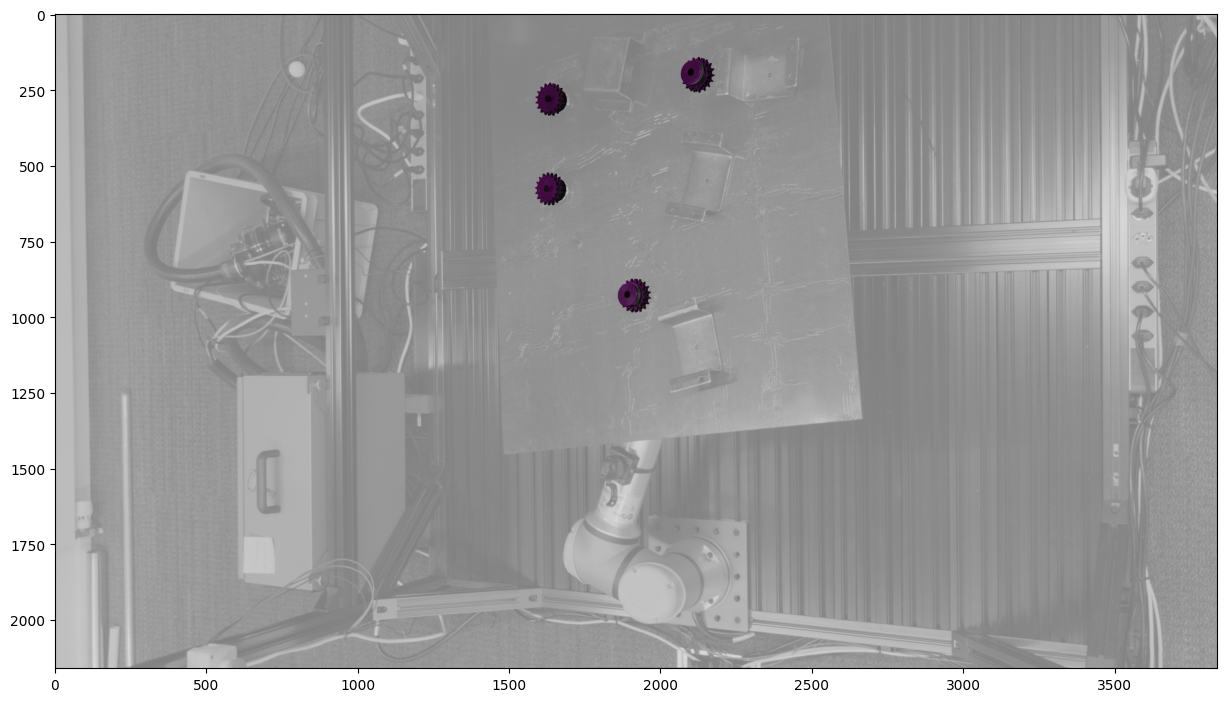

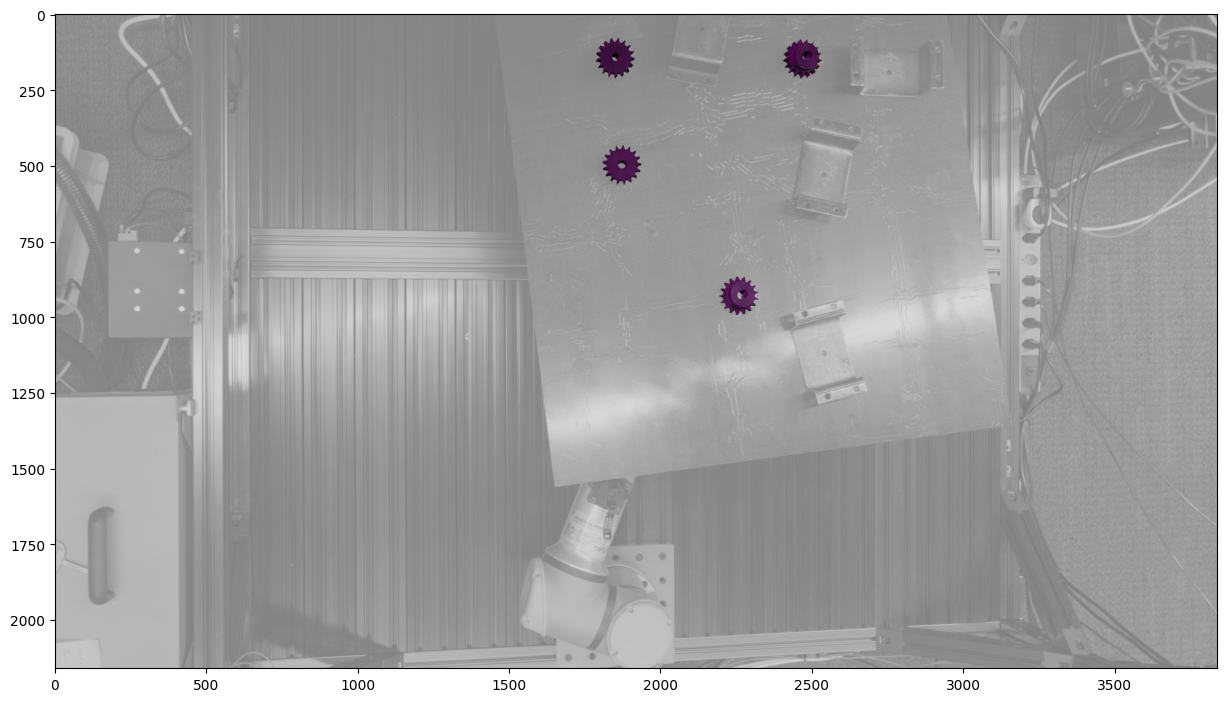

In [6]:
# scene_dir = "./datasets/ipd_bop_data_jan25_1/train_pbr/000000/"
# models_dir = './datasets/ipd_bop_data_jan25_1/models_eval/'
scene_dir = "./datasets/ipd/test/000004/"
models_dir = './datasets/ipd/models_eval/'
cam_ids = ["cam1", "cam2", "cam3"]
image_id = 1
obj_id = 8
obj_id_path = str(1000000+obj_id)[1:]
ply_file = os.path.join(models_dir, f"obj_{obj_id_path}.ply")
obj = trimesh.load(ply_file)
yolo_model_path = f'bpc/yolo/models/detection/obj_{obj_id}/yolo11-detection-obj_{obj_id}.pt'
#pose_model_path = f'bpc/pose/pose_checkpoints/obj_{obj_id}/final_model.pth'
pose_model_path = f'bpc/pose/val_checkpoints/obj_{obj_id}/best_model.pth'

pose_params = PoseEstimatorParams(
    yolo_model_path=yolo_model_path,
    pose_model_path=pose_model_path, 
    yolo_conf_thresh=0.01,
    #rotation_mode="quat"  # Using quaternion mode as in the checkpoint.
)
pose_estimator = PoseEstimator(pose_params)
t = time.time()
capture = Capture.from_dir(scene_dir, cam_ids, image_id, obj_id)
detections = pose_estimator._detect(capture)
pose_predictions = pose_estimator._match(capture, detections)
pose_estimator._estimate_rotation(pose_predictions)
print(time.time() - t)

for idx in range(len(capture.Ks)):
    plt.figure(figsize=(15, 15))
    plt.imshow(capture.images[idx])
    a, b = render_mask(obj, capture.Ks[idx], (capture.RTs[idx]), capture.images[0].shape[:2][::-1], [x.pose for x in pose_predictions])
    plt.imshow(a, alpha=0.5)
    plt.show()


Auto-detected rotation mode from checkpoint: quat
Using rotation mode: quat
Loading camera parameters from: ./datasets/ipd/test/000003/scene_camera_cam3.json
Missing GT files for cam1
[]
Processing image shape: (2160, 3840, 3)

0: 736x1280 2 object_11s, 9.5ms
Speed: 4.7ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 2 object_11s, 8.3ms
Speed: 7.3ms preprocess, 8.3ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 2 object_11s, 8.2ms
Speed: 4.5ms preprocess, 8.2ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)

--- Cost Matrix Stats ---
Shape: (2, 2, 2)
Min: 3.5371, Max: 241.4714, Mean: 140.2600

Random samples from cost_matrix:
  cost_matrix[0,1,0] = 115.8541
  cost_matrix[1,1,0] = 191.9657
  cost_matrix[1,1,0] = 191.9657
  cost_matrix[0,1,1] = 240.0904
  cost_matrix[1,0,1] = 125.4469
0.7097671031951904


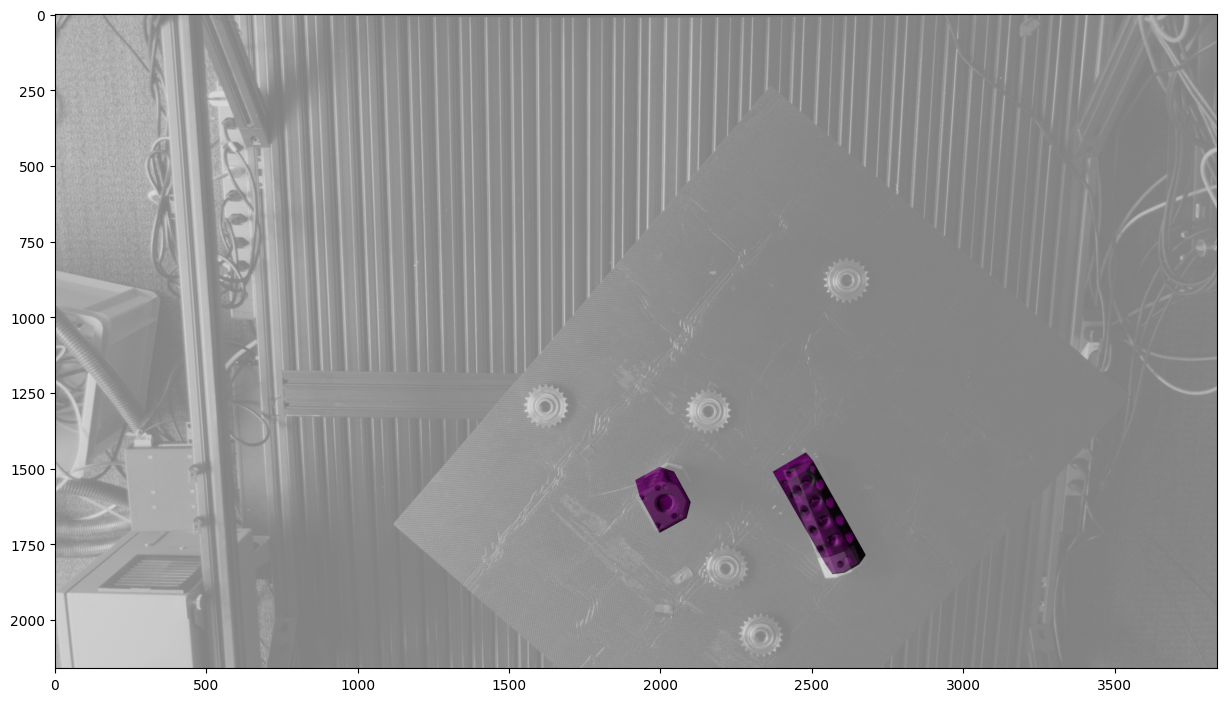

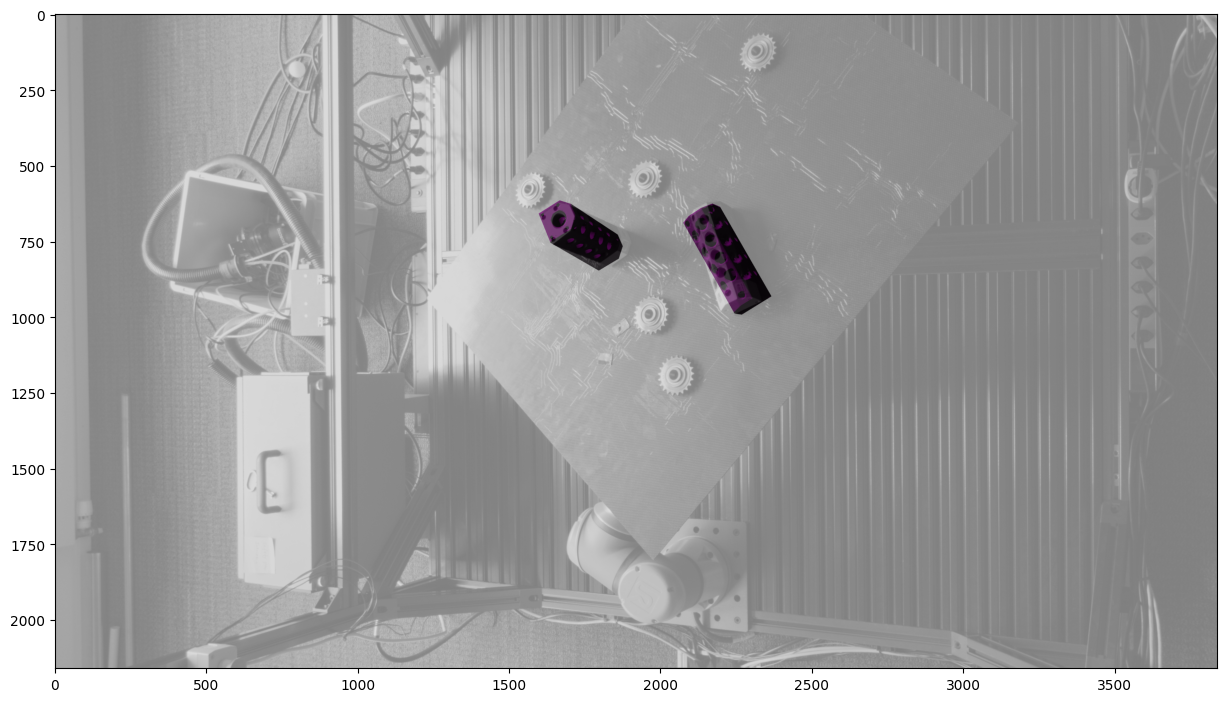

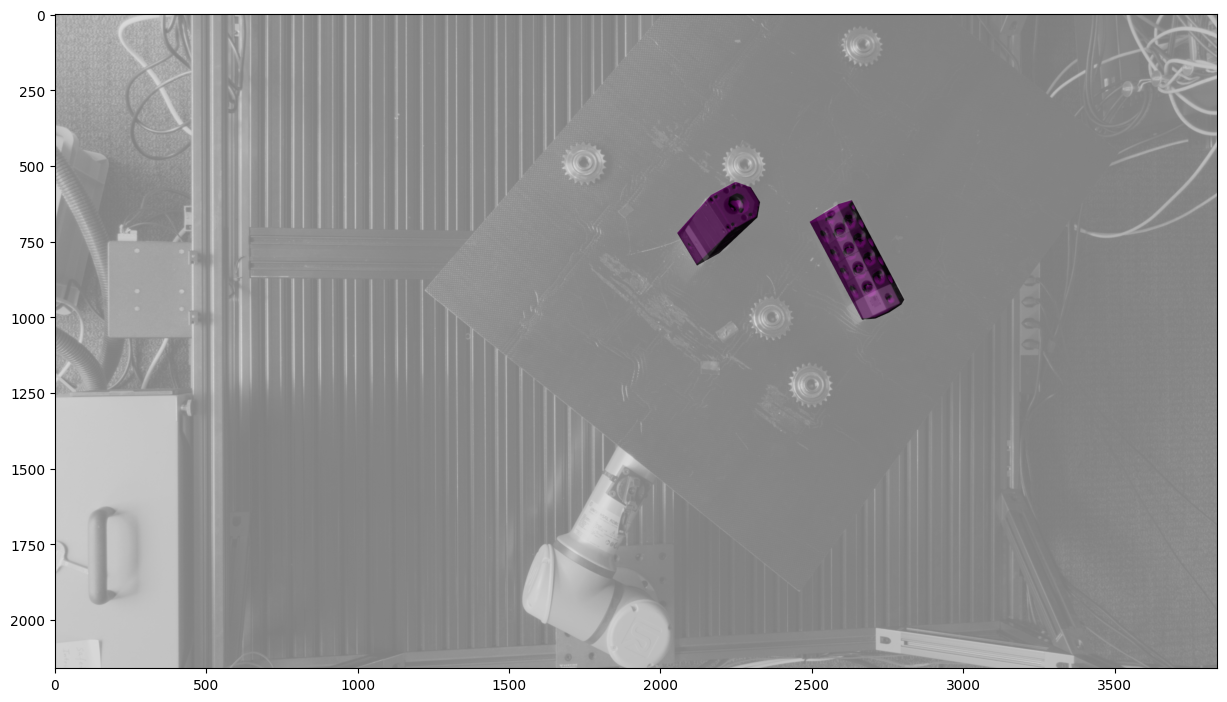

In [7]:
# scene_dir = "./datasets/ipd_bop_data_jan25_1/train_pbr/000000/"
# models_dir = './datasets/ipd_bop_data_jan25_1/models_eval/'
scene_dir = "./datasets/ipd/test/000003/"
models_dir = './datasets/ipd/models_eval/'
cam_ids = ["cam1", "cam2", "cam3"]
image_id = 2
obj_id = 11
obj_id_path = str(1000000+obj_id)[1:]
ply_file = os.path.join(models_dir, f"obj_{obj_id_path}.ply")
obj = trimesh.load(ply_file)
yolo_model_path = f'bpc/yolo/models/detection/obj_{obj_id}/yolo11-detection-obj_{obj_id}.pt'
pose_model_path = f'bpc/pose/pose_checkpoints/obj_{obj_id}/final_model.pth'

pose_params = PoseEstimatorParams(
    yolo_model_path=yolo_model_path,
    pose_model_path=pose_model_path, 
    yolo_conf_thresh=0.01,
)
pose_estimator = PoseEstimator(pose_params)
t = time.time()
capture = Capture.from_dir(scene_dir, cam_ids, image_id, obj_id)
detections = pose_estimator._detect(capture)
pose_predictions = pose_estimator._match(capture, detections)
pose_estimator._estimate_rotation(pose_predictions)
print(time.time() - t)

for idx in range(len(capture.Ks)):
    plt.figure(figsize=(15, 15))
    plt.imshow(capture.images[idx])
    a, b = render_mask(obj, capture.Ks[idx], (capture.RTs[idx]), capture.images[0].shape[:2][::-1], [x.pose for x in pose_predictions])
    plt.imshow(a, alpha=0.5)
    plt.show()
